In [ ]:
Challenge Set 1
Topic:        Explore MTA turnstile data
Date:         10/03/2016
Name:         James McGlone
Worked with:  Rebecca provided help

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import dateutil
import datetime

from IPython.display import Image

%matplotlib inline

In [136]:
###Challenge 1.1
#Open up a new Jupyter notebook
#Download a few MTA turnstile data files
#Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). 
#These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest
#of the columns in a row. 

In [223]:
# read mta turnstile data and append to one dataframe 

mtafile0 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160820.txt')
mtafile1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160827.txt')
mtaf = mtafile0.append(mtafile1, ignore_index = True)
mtafile2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt')
mtaf = mtaf.append(mtafile2, ignore_index = True)
mtafile3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt')
mtaf = mtaf.append(mtafile3, ignore_index = True)
mtafile4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt')
mtaf = mtaf.append(mtafile4, ignore_index = True)
mtafile5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160924.txt')
mtaf = mtaf.append(mtafile5, ignore_index = True)


mtaf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,00:00:00,REGULAR,5780627,1960084
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,04:00:00,REGULAR,5780664,1960087
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,08:00:00,REGULAR,5780684,1960117
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,12:00:00,REGULAR,5780821,1960213
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,16:00:00,REGULAR,5781035,1960275


In [224]:
mtaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155725 entries, 0 to 1155724
Data columns (total 11 columns):
C/A                                                                     1155725 non-null object
UNIT                                                                    1155725 non-null object
SCP                                                                     1155725 non-null object
STATION                                                                 1155725 non-null object
LINENAME                                                                1155725 non-null object
DIVISION                                                                1155725 non-null object
DATE                                                                    1155725 non-null object
TIME                                                                    1155725 non-null object
DESC                                                                    1155725 non-null object
ENTRIES                

In [225]:
mtaf["COMBINEDKEY"] = mtaf["C/A"]+ "," + mtaf["UNIT"] + "," + mtaf["SCP"] + "," + mtaf["STATION"] 

In [226]:
mtaf.columns = [column.strip() for column in mtaf.columns]

In [227]:
mtaf.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINEDKEY
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,00:00:00,REGULAR,5780627,1960084,"A002,R051,02-00-00,59 ST"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,04:00:00,REGULAR,5780664,1960087,"A002,R051,02-00-00,59 ST"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,08:00:00,REGULAR,5780684,1960117,"A002,R051,02-00-00,59 ST"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,12:00:00,REGULAR,5780821,1960213,"A002,R051,02-00-00,59 ST"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,16:00:00,REGULAR,5781035,1960275,"A002,R051,02-00-00,59 ST"
5,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,20:00:00,REGULAR,5781349,1960323,"A002,R051,02-00-00,59 ST"
6,A002,R051,02-00-00,59 ST,NQR456,BMT,08/14/2016,00:00:00,REGULAR,5781507,1960349,"A002,R051,02-00-00,59 ST"
7,A002,R051,02-00-00,59 ST,NQR456,BMT,08/14/2016,04:00:00,REGULAR,5781536,1960354,"A002,R051,02-00-00,59 ST"
8,A002,R051,02-00-00,59 ST,NQR456,BMT,08/14/2016,08:00:00,REGULAR,5781556,1960370,"A002,R051,02-00-00,59 ST"
9,A002,R051,02-00-00,59 ST,NQR456,BMT,08/14/2016,12:00:00,REGULAR,5781667,1960431,"A002,R051,02-00-00,59 ST"


In [228]:
mtaf.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS', u'COMBINEDKEY'],
      dtype='object')

In [229]:
mtaf.columns =[column.strip() for column in mtaf.columns]
mtaf.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS', u'COMBINEDKEY'],
      dtype='object')

In [230]:
#Challenge 1.2

In [231]:
mtaf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINEDKEY
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,00:00:00,REGULAR,5780627,1960084,"A002,R051,02-00-00,59 ST"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,04:00:00,REGULAR,5780664,1960087,"A002,R051,02-00-00,59 ST"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,08:00:00,REGULAR,5780684,1960117,"A002,R051,02-00-00,59 ST"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,12:00:00,REGULAR,5780821,1960213,"A002,R051,02-00-00,59 ST"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,16:00:00,REGULAR,5781035,1960275,"A002,R051,02-00-00,59 ST"


In [232]:
from datetime import datetime as dt

In [233]:
mtaf.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS', u'COMBINEDKEY'],
      dtype='object')

In [234]:
mtaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155725 entries, 0 to 1155724
Data columns (total 12 columns):
C/A            1155725 non-null object
UNIT           1155725 non-null object
SCP            1155725 non-null object
STATION        1155725 non-null object
LINENAME       1155725 non-null object
DIVISION       1155725 non-null object
DATE           1155725 non-null object
TIME           1155725 non-null object
DESC           1155725 non-null object
ENTRIES        1155725 non-null int64
EXITS          1155725 non-null int64
COMBINEDKEY    1155725 non-null object
dtypes: int64(2), object(10)
memory usage: 105.8+ MB


In [235]:
mtaf["DATETIME"] = pd.to_datetime(mtaf.DATE + " " + mtaf.TIME, format="%m/%d/%Y %H:%M:%S")
mtaf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINEDKEY,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,00:00:00,REGULAR,5780627,1960084,"A002,R051,02-00-00,59 ST",2016-08-13 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,04:00:00,REGULAR,5780664,1960087,"A002,R051,02-00-00,59 ST",2016-08-13 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,08:00:00,REGULAR,5780684,1960117,"A002,R051,02-00-00,59 ST",2016-08-13 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,12:00:00,REGULAR,5780821,1960213,"A002,R051,02-00-00,59 ST",2016-08-13 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/13/2016,16:00:00,REGULAR,5781035,1960275,"A002,R051,02-00-00,59 ST",2016-08-13 16:00:00


In [236]:
#Sanity Check to verify that "C/A", UNIT, SCP, STATION, DATE_TIME... from Ramesh's solutions
(mtaf
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
1125861,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 12:00:00,2
1125860,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,2
1125850,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 16:00:00,2
1125851,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 20:00:00,2
1125852,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 00:00:00,2


In [237]:
#Get rid of the duplicate entry
mtaf.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
mtaf.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [238]:
mask = ((mtaf["C/A"] == "R626") &
        (mtaf["UNIT"] == "R062") &
        (mtaf["SCP"] == "00-00-00") &
        (mtaf["STATION"] == "CROWN HTS-UTICA"))
mtaf[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINEDKEY,DATETIME
1149261,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/23/2016,20:00:00,REGULAR,12155480,2699280,"R626,R062,00-00-00,CROWN HTS-UTICA",2016-09-23 20:00:00
1149260,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/23/2016,16:00:00,REGULAR,12154955,2698995,"R626,R062,00-00-00,CROWN HTS-UTICA",2016-09-23 16:00:00
1149259,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/23/2016,12:00:00,REGULAR,12154399,2698860,"R626,R062,00-00-00,CROWN HTS-UTICA",2016-09-23 12:00:00
1149258,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/23/2016,08:00:00,REGULAR,12153503,2698788,"R626,R062,00-00-00,CROWN HTS-UTICA",2016-09-23 08:00:00
1149257,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/23/2016,04:00:00,REGULAR,12152549,2698745,"R626,R062,00-00-00,CROWN HTS-UTICA",2016-09-23 04:00:00


In [239]:
(mtaf
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-13 00:00:00,1
770471,R154,R116,00-03-02,50 ST,2016-09-22 16:00:00,1
770477,R154,R116,00-03-02,50 ST,2016-09-23 16:00:00,1
770476,R154,R116,00-03-02,50 ST,2016-09-23 12:00:00,1
770475,R154,R116,00-03-02,50 ST,2016-09-23 08:00:00,1


In [240]:
mtaf2 = mtaf.drop(['LINENAME', 'DATE', 'TIME', 'DIVISION', 'DESC', 'EXITS', 'COMBINEDKEY'], axis=1) #'EXITS', 'COMBINEDKEY'
mtaf2.head()

,C/A,UNIT,SCP,STATION,ENTRIES,DATETIME
1155724,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,2016-09-23 21:00:00
1155723,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,2016-09-23 17:00:00
1155722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,2016-09-23 13:00:00
1155721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,2016-09-23 09:00:00
1155720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,2016-09-23 05:00:00


In [241]:
mtaf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,COMBINEDKEY,DATETIME
1155724,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,21:00:00,REGULAR,5554,271,"TRAM2,R469,00-05-01,RIT-ROOSEVELT",2016-09-23 21:00:00
1155723,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,17:00:00,REGULAR,5554,271,"TRAM2,R469,00-05-01,RIT-ROOSEVELT",2016-09-23 17:00:00
1155722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,13:00:00,REGULAR,5554,271,"TRAM2,R469,00-05-01,RIT-ROOSEVELT",2016-09-23 13:00:00
1155721,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,09:00:00,REGULAR,5554,271,"TRAM2,R469,00-05-01,RIT-ROOSEVELT",2016-09-23 09:00:00
1155720,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,05:00:00,REGULAR,5554,271,"TRAM2,R469,00-05-01,RIT-ROOSEVELT",2016-09-23 05:00:00


In [242]:
# Exercise 1.3

In [243]:
mtaf_day = mtaf.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()
mtaf_day.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/13/2016,5781349
1,A002,R051,02-00-00,59 ST,08/14/2016,5782092
2,A002,R051,02-00-00,59 ST,08/15/2016,5783580
3,A002,R051,02-00-00,59 ST,08/16/2016,5785168
4,A002,R051,02-00-00,59 ST,08/17/2016,5786747


In [244]:
mtaf_day[["PREV_DATE", "PREV_ENTRIES"]] = (mtaf_day
                                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                   .transform(lambda grp: grp.shift(1)))
mtaf_day.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/13/2016,5781349,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/14/2016,5782092,08/13/2016,5781349.0
2,A002,R051,02-00-00,59 ST,08/15/2016,5783580,08/14/2016,5782092.0
3,A002,R051,02-00-00,59 ST,08/16/2016,5785168,08/15/2016,5783580.0
4,A002,R051,02-00-00,59 ST,08/17/2016,5786747,08/16/2016,5785168.0


In [245]:
#drop the rows for the last date
mtaf_day.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [246]:
#mtaf_day[mtaf_day["ENTRIES"] < mtaf_day["PREV_ENTRIES"]].head()


In [247]:
#Why is counter in reverse?
#mask = ((mtaf2["C/A"] == "A011") & 
#(mtaf2["UNIT"] == "R080") & 
#(mtaf2["SCP"] == "01-00-00") & 
#(mtaf2["STATION"] == "57 ST-7 AV") &
#(mtaf["DATETIME"].dt.date == datetime(2016, 8, 27).date()))

#mtaf_day[mask].head()

In [248]:

# Let's see how many stations have this problem

#(mtaf_day[mtaf_day["ENTRIES"] < mtaf_day["PREV_ENTRIES"]]
#    .groupby(["C/A", "UNIT", "SCP", "STATION"])
#     .size())

In [249]:
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter


mtaf_day["DAILY_ENTRIES"] = mtaf_day.apply(get_daily_counts, axis=1, max_counter=1000000)

(194, 1894869683.0)
(262183, 67111299.0)
(615, 8026931.0)
(8027692, 32455.0)
(654311433, 97.0)
(63, 1054429.0)
(685, 101300823.0)
(1933, 7838093.0)
(2275, 1298473.0)
(4198, 4261918.0)
(2862, 2044694.0)
(67108951, 17902357.0)
(1912607049, 7509132.0)
(69, 2947006.0)
(285, 1494569141.0)
(2542, 14129479.0)
(67108864, 0.0)
(449, 4662193.0)
(335600216, 1374824.0)
(3115, 2765638.0)
(16827861, 75577.0)
(36, 3252790.0)
(1117, 3665497.0)
(98129, 3736809.0)
(3739533, 98129.0)
(783138, 2711052.0)
(2712030, 783138.0)
(262269, 10823938.0)
(1452, 1460387.0)
(1154413610, 8957775.0)
(100665773, 35655801.0)
(1443, 1014193.0)
(186916568, 604712476.0)
(67108866, 50331984.0)
(874, 6130902.0)
(598, 11078528.0)
(1160, 74672293.0)
(0, 117440532.0)
(100663296, 1299.0)
(117440514, 100663296.0)
(2123, 9170483.0)
(428, 2336204.0)
(1024, 12498870.0)
(4125, 10647798.0)


In [250]:
mtaf_day.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/14/2016,5782092,08/13/2016,5781349.0,743.0
2,A002,R051,02-00-00,59 ST,08/15/2016,5783580,08/14/2016,5782092.0,1488.0
3,A002,R051,02-00-00,59 ST,08/16/2016,5785168,08/15/2016,5783580.0,1588.0
4,A002,R051,02-00-00,59 ST,08/17/2016,5786747,08/16/2016,5785168.0,1579.0
5,A002,R051,02-00-00,59 ST,08/18/2016,5788400,08/17/2016,5786747.0,1653.0
6,A002,R051,02-00-00,59 ST,08/19/2016,5790022,08/18/2016,5788400.0,1622.0
7,A002,R051,02-00-00,59 ST,08/20/2016,5790926,08/19/2016,5790022.0,904.0
8,A002,R051,02-00-00,59 ST,08/21/2016,5791648,08/20/2016,5790926.0,722.0
9,A002,R051,02-00-00,59 ST,08/22/2016,5793152,08/21/2016,5791648.0,1504.0
10,A002,R051,02-00-00,59 ST,08/23/2016,5794827,08/22/2016,5793152.0,1675.0


In [251]:
#CHallenge 1.4 Plotting the dates vs count

import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
mtaf_day["DATENEW"] = pd.to_datetime(mtaf_day.DATE)
mtaf_day.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATENEW
1,A002,R051,02-00-00,59 ST,08/14/2016,5782092,08/13/2016,5781349.0,743.0,2016-08-14
2,A002,R051,02-00-00,59 ST,08/15/2016,5783580,08/14/2016,5782092.0,1488.0,2016-08-15
3,A002,R051,02-00-00,59 ST,08/16/2016,5785168,08/15/2016,5783580.0,1588.0,2016-08-16
4,A002,R051,02-00-00,59 ST,08/17/2016,5786747,08/16/2016,5785168.0,1579.0,2016-08-17
5,A002,R051,02-00-00,59 ST,08/18/2016,5788400,08/17/2016,5786747.0,1653.0,2016-08-18


In [253]:
plt.figure(figsize=(10,3))

mask = ((mtaf_day["C/A"] == "A002") & 
        (mtaf_day["UNIT"] == "R051") & 
        (mtaf_day["SCP"] == "02-03-02") & 
        (mtaf_day["STATION"] == "59 ST"))

one_turnstile = mtaf_day[(mask)]

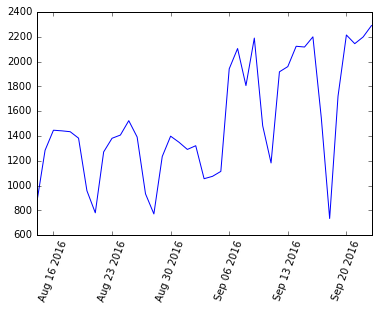

In [254]:
dates = one_turnstile["DATENEW"]
counts = one_turnstile["DAILY_ENTRIES"]

plt.xticks(rotation=70)
plt.plot(dates,counts)

In [255]:
#challenge 1.5

In [256]:
mtaf_combined = (mtaf_day
                 .groupby(['C/A', 'UNIT', 'STATION', 'DATENEW'])
                 .DAILY_ENTRIES
                 .sum()
                 .reset_index())

In [257]:
mtaf_combined.head(20)

,C/A,UNIT,STATION,DATENEW,DAILY_ENTRIES
0,A002,R051,59 ST,2016-08-14,8405.0
1,A002,R051,59 ST,2016-08-15,14988.0
2,A002,R051,59 ST,2016-08-16,16675.0
3,A002,R051,59 ST,2016-08-17,16860.0
4,A002,R051,59 ST,2016-08-18,16859.0
5,A002,R051,59 ST,2016-08-19,16410.0
6,A002,R051,59 ST,2016-08-20,9579.0
7,A002,R051,59 ST,2016-08-21,7860.0
8,A002,R051,59 ST,2016-08-22,15188.0
9,A002,R051,59 ST,2016-08-23,16724.0


In [258]:
#1.6
mtaf_station = (mtaf_combined
                .groupby(['STATION', 'DATENEW'])
                .DAILY_ENTRIES
                .sum()
                .reset_index())

In [259]:
mtaf_station.head(10)

,STATION,DATENEW,DAILY_ENTRIES
0,1 AV,2016-08-14,12759.0
1,1 AV,2016-08-15,15126.0
2,1 AV,2016-08-16,22101.0
3,1 AV,2016-08-17,20160.0
4,1 AV,2016-08-18,20078.0
5,1 AV,2016-08-19,20069.0
6,1 AV,2016-08-20,15470.0
7,1 AV,2016-08-21,12413.0
8,1 AV,2016-08-22,17265.0
9,1 AV,2016-08-23,19371.0


In [260]:
# 1.7

mask = ((mtaf_station['STATION'] == "59 ST"))

station_59ST = mtaf_station[mask]

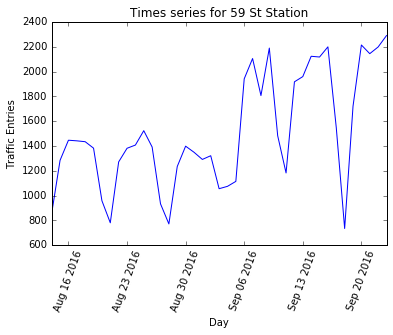

In [261]:
plt.figure()

dates = station_59ST["DATENEW"]
count = station_59ST["DAILY_ENTRIES"]

plt.xticks(rotation=70)
plt.plot(dates, counts)
plt.title('Times series for 59 St Station')
plt.xlabel('Day')
plt.ylabel('Traffic Entries')

In [265]:
# add numbered days of the week [0-6]

station_59ST["WEEKDAY"] = station_59ST["DATENEW"].dt.weekday
station_59ST.head(40)

/Users/jamesmcglone/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,STATION,DATENEW,DAILY_ENTRIES,WEEKDAY
3484,59 ST,2016-08-14,33877.0,6
3485,59 ST,2016-08-15,67373.0,0
3486,59 ST,2016-08-16,75197.0,1
3487,59 ST,2016-08-17,76937.0,2
3488,59 ST,2016-08-18,75815.0,3
3489,59 ST,2016-08-19,73388.0,4
3490,59 ST,2016-08-20,46205.0,5
3491,59 ST,2016-08-21,37062.0,6
3492,59 ST,2016-08-22,67496.0,0
3493,59 ST,2016-08-23,74459.0,1


In [271]:
#fill out days for each week

week1 = station_59ST[((station_59ST.DATENEW >= "2016-08-15") & (station_59ST.DATENEW <= "2016-08-21"))]  #2016-08-15
week2 = station_59ST[((station_59ST.DATENEW >= "2016-08-22") & (station_59ST.DATENEW <= "2016-08-28"))]
week3 = station_59ST[((station_59ST.DATENEW >= "2016-08-29") & (station_59ST.DATENEW <= "2016-09-04"))]
week4 = station_59ST[((station_59ST.DATENEW >= "2016-09-05") & (station_59ST.DATENEW <= "2016-09-11"))]
week5 = station_59ST[((station_59ST.DATENEW >= "2016-09-12") & (station_59ST.DATENEW <= "2016-09-18"))]


#display first week - should be chart 7 rows long, station, datenew, daily_entries, weekday
week5

,STATION,DATENEW,DAILY_ENTRIES,WEEKDAY
3513,59 ST,2016-09-12,75150.0,0
3514,59 ST,2016-09-13,85029.0,1
3515,59 ST,2016-09-14,86123.0,2
3516,59 ST,2016-09-15,86909.0,3
3517,59 ST,2016-09-16,85050.0,4
3518,59 ST,2016-09-17,57700.0,5
3519,59 ST,2016-09-18,42806.0,6


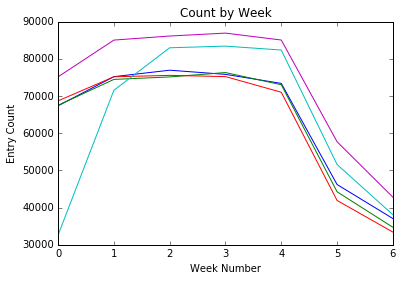

In [273]:
plt.plot(week1["WEEKDAY"], week1["DAILY_ENTRIES"])
plt.plot(week2["WEEKDAY"], week2["DAILY_ENTRIES"])
plt.plot(week3["WEEKDAY"], week3["DAILY_ENTRIES"])
plt.plot(week4["WEEKDAY"], week4["DAILY_ENTRIES"])
plt.plot(week5["WEEKDAY"], week5["DAILY_ENTRIES"])

plt.title('Count by Week')
plt.xlabel('Week Number')
plt.ylabel('Entry Count')



In [276]:
# 1.9
all_stations = (mtaf_station#look up variable name
                .groupby(['STATION'])
                .DAILY_ENTRIES
                .sum()
                .reset_index()
                .sort_values("DAILY_ENTRIES", ascending = False))
print all_stations

             STATION  DAILY_ENTRIES
61    34 ST-PENN STA      5845804.0
230  GRD CNTRL-42 ST      5238350.0
59   34 ST-HERALD SQ      4253436.0
46             23 ST      4124026.0
14    14 ST-UNION SQ      3710998.0
109            86 ST      3656623.0
68   42 ST-PORT AUTH      3640365.0
349   TIMES SQ-42 ST      3531970.0
170         CANAL ST      3339157.0
223        FULTON ST      3335071.0
9             125 ST      2923559.0
222  FT HAMILTON PKY      2839519.0
85             59 ST      2765812.0
113            96 ST      2591210.0
86    59 ST COLUMBUS      2551918.0
177      CHAMBERS ST      2237263.0
214    FLUSHING-MAIN      2234960.0
13             14 ST      2185789.0
72    47-50 STS ROCK      1933327.0
254  JKSN HT-ROOSVLT      1806890.0
52             28 ST      1744502.0
240   HOWARD BCH JFK      1741346.0
97             72 ST      1723146.0
78             50 ST      1702226.0
67   42 ST-BRYANT PK      1540590.0
251  JAY ST-METROTEC      1538413.0
359   W 4 ST-WASH SQ      15

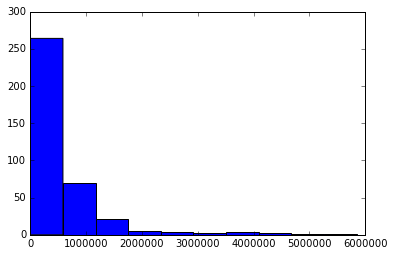

In [278]:
# 1.10
plt.hist(all_stations["DAILY_ENTRIES"]);

In [ ]:
###Methods I want to understand more fully

#.reset_index()
#.groupby()
#.sort()
#.map()
#.transform()
#.format()
#.concat()
#.first()